# Artificial Neural Network for Credit Risk Classification: Enhancing Gradient Descent with Adaptive Moment Estimation and Hyperparameter Tuning with Optuna

1. Luthfi Emillulfata (H1D022017)
2. Zia Khusnul Fauzi Akhmad (H1D022023)
3. Panky Bintang Pradana Yosua (H1D022077)

Tujuan: Meningkatkan performa model Artificial Neural Network (ANN) dalam mengklasifikasikan risiko kredit dengan memodifikasi metode Gradient Descent menggunakan Adaptive Moment Estimation (Adam).

Import all libraries needed

Mengimpor libraries/package-package yang dibutuhkan ada 9:
- pandas untuk table
- numpy untuk array python dengan kecepatan tinggi
- matplotlib untuk visualisasi data
- seaborn untuk tambahan visualisasi supaya bervariasi lagi
- sklearn untuk preprocessing dan evaluasi kinerja model
- optuna untuk hyperparameter tuning
- joblib untuk menyimpan objek python dalam bentuk file
- imblearn untuk SMOTE
- tensorflow untuk membuat model ann

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
import optuna
import os, gc, warnings, time, pathlib, joblib

from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import time

plt.rcParams.update({'font.size': 14})
sns.set_theme(style="whitegrid", palette="dark")

Membaca dataset **credit_risk.csv**. Lalu, melihat bentuk dataset

In [2]:
df = pd.read_csv('../datasets/credit_risk.csv')
df.shape

(32581, 12)

Membaca dataset. it can be found, the dataset has 32581 rows (include column names) and 12 variables. lets take a look into first 5 row and last 5 rows

*Dapat diketahui, dataset memiliki **32.581** baris dan **12** kolom*

Melihat **5 Data Pertama**

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Melihat 5 **Data Terakhir**

In [4]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


## 1. Data Understanding 

**Mengenal dan memahami** data yang akan dianalisis

### Melihat daftar kolom

person_age: Usia peminjam.
<br>person_income: Pendapatan peminjam.
<br>person_home_ownership: Status kepemilikan rumah peminjam (RENT, MORTGAGE, OWN, OTHER).
<br>person_emp_length: Lama bekerja peminjam.
<br>loan_intent: Tujuan pinjaman (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT).
<br>loan_grade: Tingkat pinjaman (A hingga G).
<br>loan_amnt: Jumlah pinjaman.
<br>loan_int_rate: Suku bunga pinjaman.
<br>loan_status: Status pembayaran pinjaman (0 atau 1).
<br>loan_percent_income: Persentase pinjaman terhadap pendapatan.
<br>cb_person_default_on_file: Riwayat gagal bayar (Y atau N).
<br>cb_person_cred_hist_length: Panjang riwayat kredit.

In [5]:
for col in df.columns:
    print(col)

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length


### Melihat jumlah baris yang tidak memiliki nilai null beserta tipe data dari kolom tersebut

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Melihat Agregasi Masing-masing kolom dengan tipe data int64 dan float64

Mendapatkan ringkasan dari dataset

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


### Understanding each column

In [8]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

#### Person Home Ownership

The ownership of someone home (kepemilikan rumah)

In [9]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

Nothing weird, nothing strange here

#### Loan Intent

Loan interest (alasan ambil pinjaman)

In [10]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

There is nothing annomaly too here

#### Loan Grade

Loan rate (tingkat pinjaman)

In [11]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

There are so many loans. i think A is the lowest rank and G the highest rank which is so many credits

#### Failed to pay

Failed to pay in their history (gagal bayar)

In [12]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

### Melihat Outliers

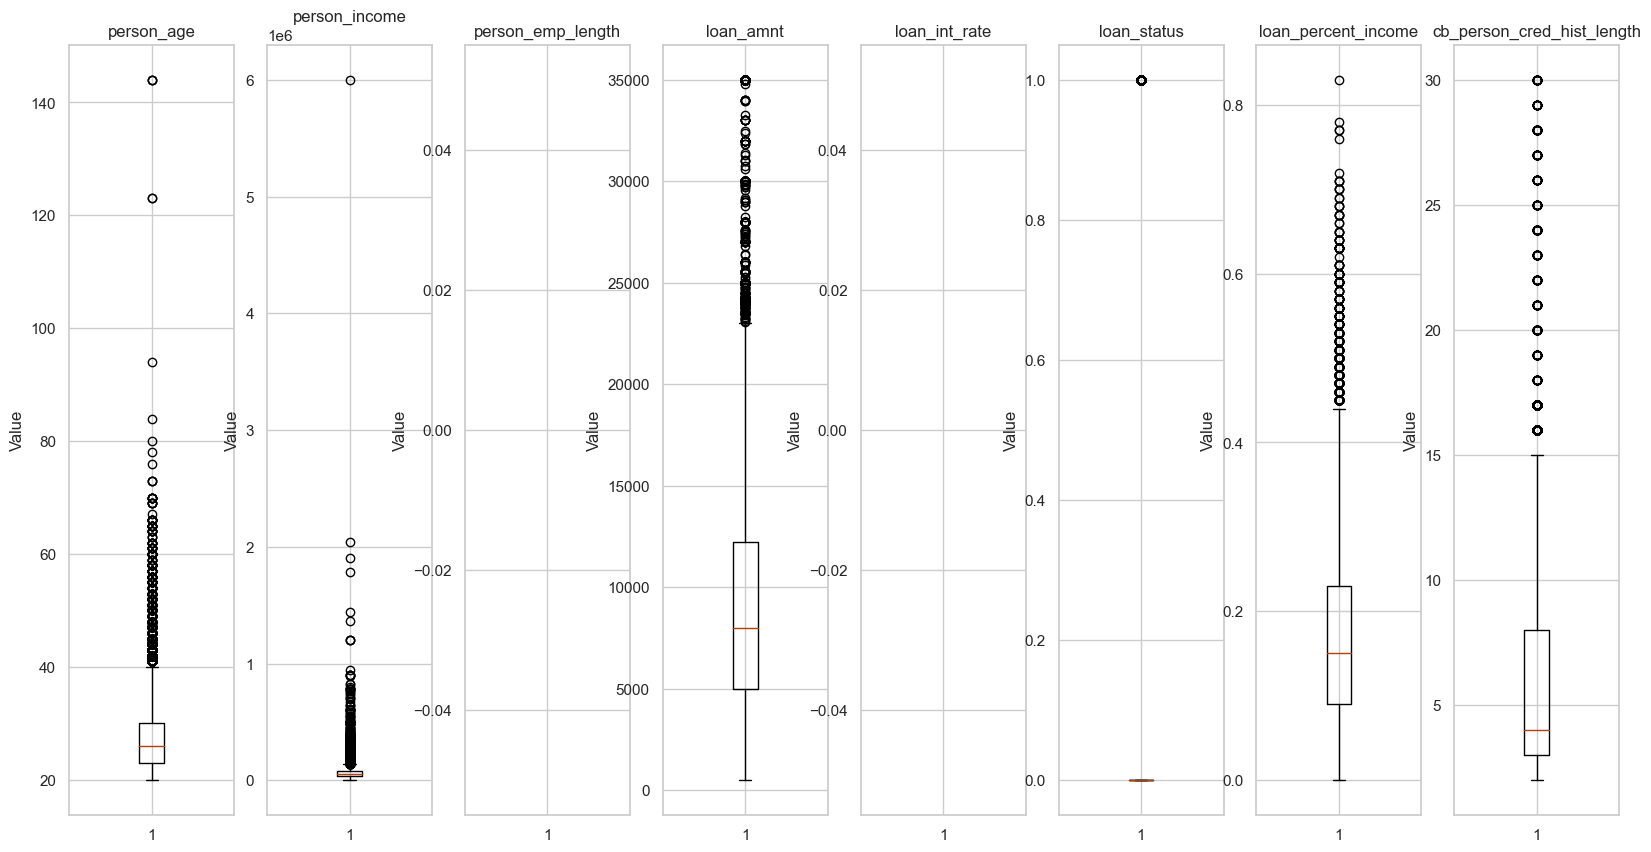

In [13]:
numeric_data = df.select_dtypes(include=['number'])
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# plt.tight_layout()
plt.show()

### Distribusi Data

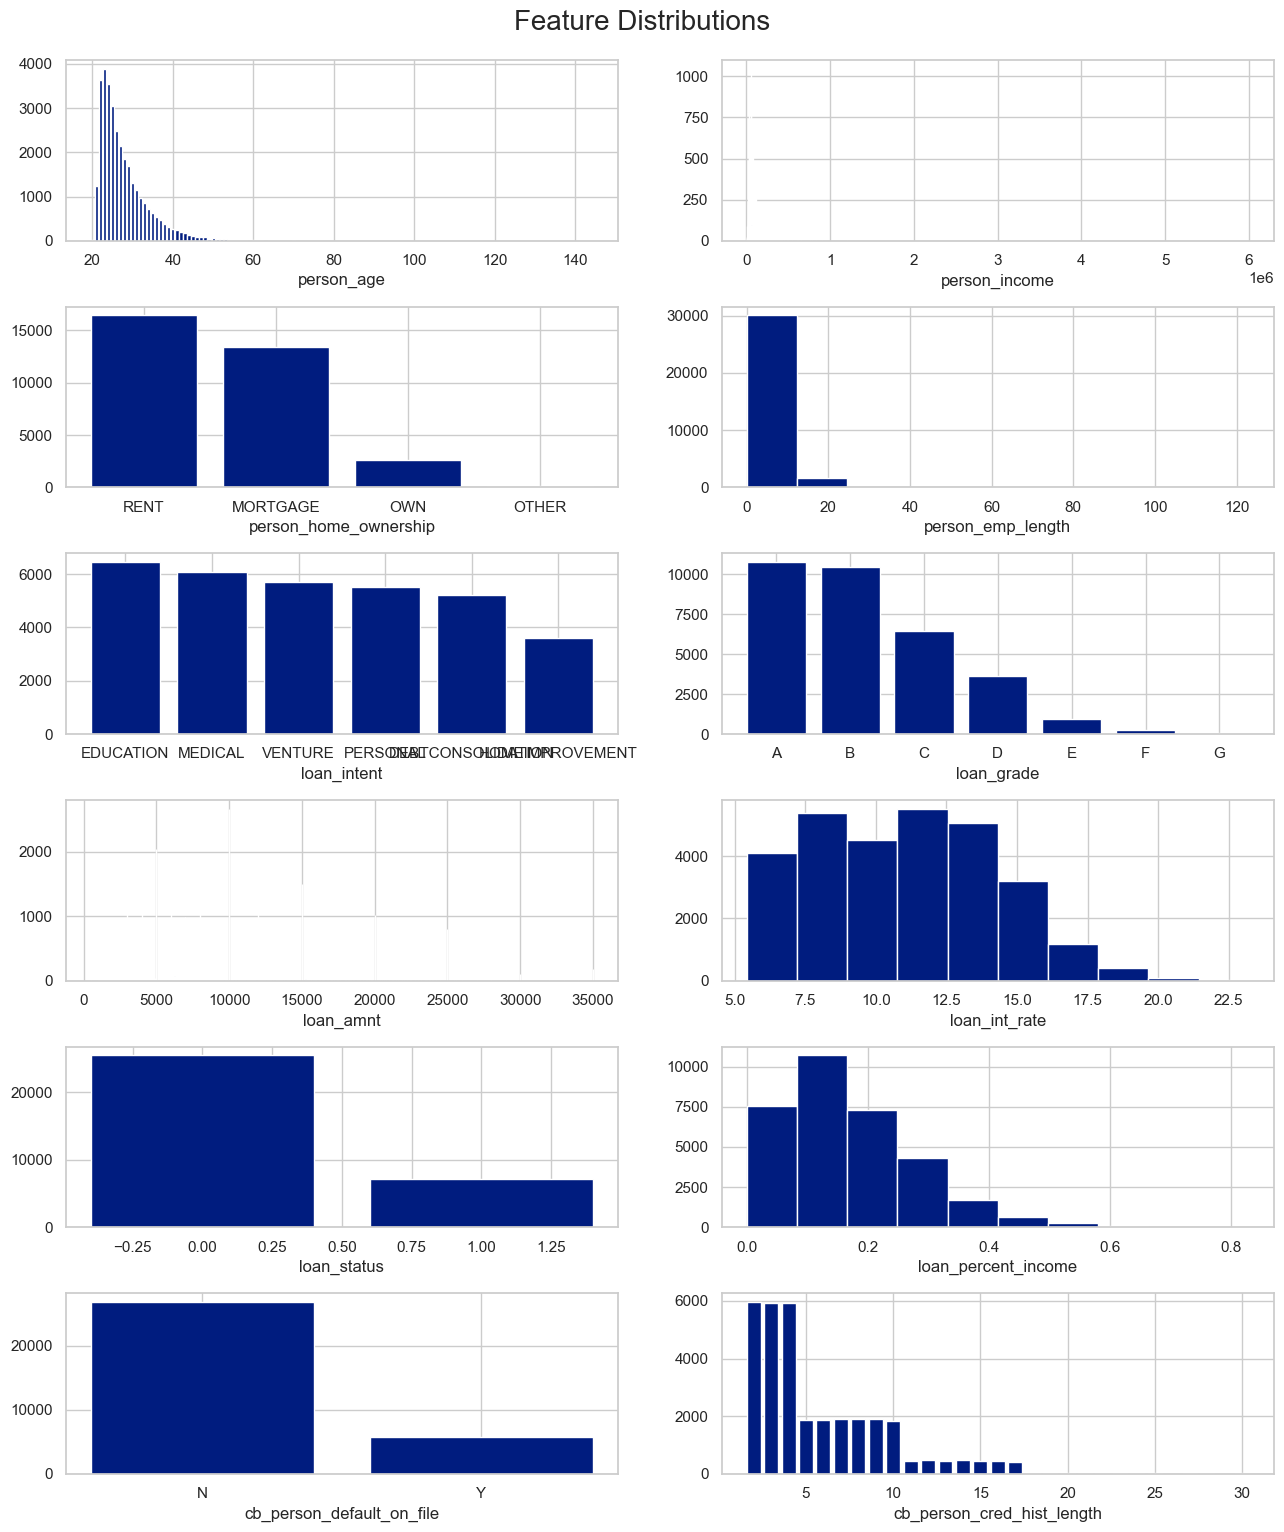

In [14]:
# Create the subplots
_, axs = plt.subplots(6, 2, figsize=(13, 15))

# Iterate over the columns and plot the histograms or bar charts
for col, ax in zip(df.columns, axs.ravel()):
    if df[col].dtype == float:
        # Specify the color for the histogram bars
        ax.hist(df[col])
    else:  # int or categorical
        vc = df[col].value_counts()
        ax.bar(vc.index, vc)
    ax.set_xlabel(col)

# Adjust the layout
plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=20)
plt.show()

### Plot Korelasi

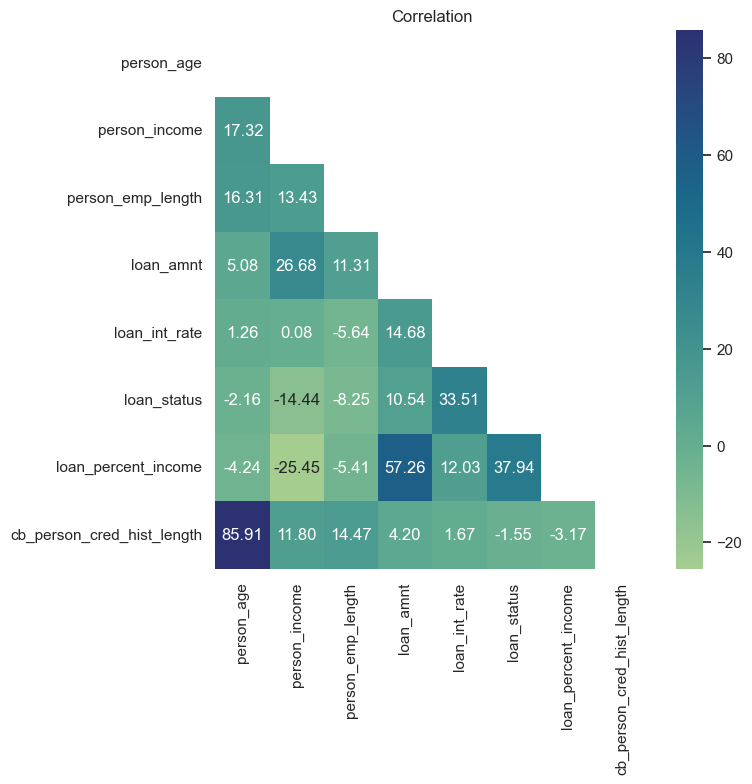

In [15]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(7, 7)) 
data_num = df.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'crest', annot= True, fmt='.2f', mask=mask)
plt.title('Correlation')
plt.show()

## 2. Data Preparation

### Melihat row yang duplikat

In [16]:
df.duplicated().sum()

165

Dapat diketahui, row yang duplikat ada **165 rows**
<br>**Menghapus row** yang duplikat

In [17]:
df.drop_duplicates(inplace=True)

Melihat row yang duplikat lagi untuk memastikan bahwa tidak ada row yang duplikat karena telah dihapus

In [18]:
df.duplicated().sum()

0

Row duplikat berhasil dihapus

Check is there any null value and how much is it

### Mengecek apakah ada null value

In [19]:
(df.isnull().sum() * 100 / len(df)).round(2).astype(str) + '%'

person_age                     0.0%
person_income                  0.0%
person_home_ownership          0.0%
person_emp_length             2.74%
loan_intent                    0.0%
loan_grade                     0.0%
loan_amnt                      0.0%
loan_int_rate                 9.55%
loan_status                    0.0%
loan_percent_income            0.0%
cb_person_default_on_file      0.0%
cb_person_cred_hist_length     0.0%
dtype: object

Mengisi kolom **person_emp_length** dengan nilai rata-ratanya

In [20]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())

Mengecek apakah null value pada kolom **person_emp_length** sudah dihapus

In [21]:
(df.isnull().sum() * 100 / len(df)).round(2).astype(str) + '%'

person_age                     0.0%
person_income                  0.0%
person_home_ownership          0.0%
person_emp_length              0.0%
loan_intent                    0.0%
loan_grade                     0.0%
loan_amnt                      0.0%
loan_int_rate                 9.55%
loan_status                    0.0%
loan_percent_income            0.0%
cb_person_default_on_file      0.0%
cb_person_cred_hist_length     0.0%
dtype: object

Mengisi kolom **loan_int_rate** berdasarkan **loan_grade**

Melihat rata-rata **loan_int_rate** berdasaarkan masing-masing kelas **loan_grade**

In [22]:
mean_loan_int_rate_by_grade = df.groupby('loan_grade')['loan_int_rate'].mean()
mean_loan_int_rate_by_grade

loan_grade
A     7.328423
B    10.995756
C    13.464579
D    15.360698
E    17.008409
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [23]:
def fill_loan_int_rate(row):
    if pd.isnull(row['loan_int_rate']):
        return mean_loan_int_rate_by_grade[row['loan_grade']]
    else:
        return row['loan_int_rate']

In [24]:
df['loan_int_rate'] = df.apply(fill_loan_int_rate, axis=1)

In [25]:
(df.isnull().sum() * 100 / len(df)).round(2).astype(str) + '%'

person_age                    0.0%
person_income                 0.0%
person_home_ownership         0.0%
person_emp_length             0.0%
loan_intent                   0.0%
loan_grade                    0.0%
loan_amnt                     0.0%
loan_int_rate                 0.0%
loan_status                   0.0%
loan_percent_income           0.0%
cb_person_default_on_file     0.0%
cb_person_cred_hist_length    0.0%
dtype: object

### Menghapus Data null value

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum() * 100 / len(df)

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

### Binary Value Label Encoder

Binary Value Label Encoder adalah teknik pengkodean untuk variabel kategori di mana kategori dikodekan menjadi **nilai biner (0 dan 1)**. Hal ini dilakukan supaya model dapat mempelajari data karena telah bersifat numerik

In [28]:
df['cb_person_default_on_file'] = LabelEncoder().fit_transform(df['cb_person_default_on_file'])

In [29]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32416 non-null  int64  
 1   person_income                   32416 non-null  int64  
 2   person_emp_length               32416 non-null  float64
 3   loan_amnt                       32416 non-null  int64  
 4   loan_int_rate                   32416 non-null  float64
 5   loan_status                     32416 non-null  int64  
 6   loan_percent_income             32416 non-null  float64
 7   cb_person_cred_hist_length      32416 non-null  int64  
 8   person_home_ownership_MORTGAGE  32416 non-null  uint8  
 9   person_home_ownership_OTHER     32416 non-null  uint8  
 10  person_home_ownership_OWN       32416 non-null  uint8  
 11  person_home_ownership_RENT      32416 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

### Split Dataset

Memisahkan features (variable independen/X) dan label/target (variable dependent/y)

In [31]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_0,cb_person_default_on_file_1
0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Mengecek Imbalance Class (apakah label/target memiliki class dengan jumlah data yang tidak seimbang)

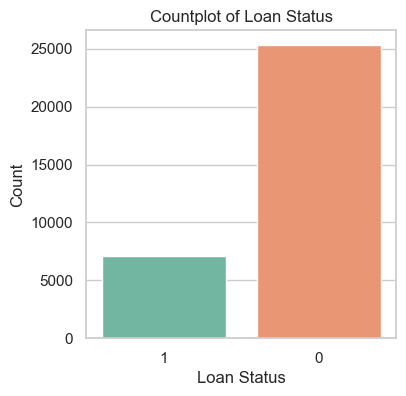

In [32]:
sns.set_style({'axes.grid' : True})
plt.figure(figsize=(4, 4))
sns.countplot(x="loan_status", data=df, palette="Set2", order=df["loan_status"].unique())
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.show()

Menangani **imbalance class** dengan membuat sample yang mirip namun tidak duplikat menggunakan metode **SMOTE**

In [33]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [34]:
# Mengkonversi X_resampled dan y_resampled menjadi dataframe pandas
X_resampled_df = pd.DataFrame(X_resampled, columns=X_resampled.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['loan_status'])

# Menggabungkan X dan y
new_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

Mengecek apakah label masih imbalance atau tidak

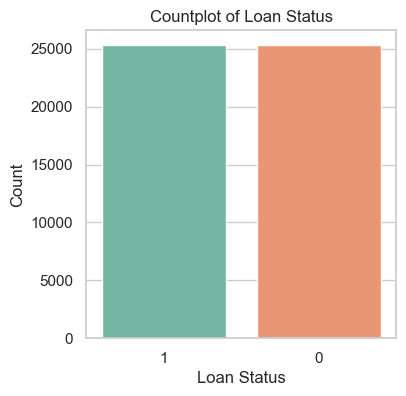

In [35]:
plt.figure(figsize=(4, 4))
sns.countplot(x="loan_status", data=new_df, palette="Set2", order=df["loan_status"].unique())
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Countplot of Loan Status")
plt.show()

### Normalization

Melakukan normalisasi supaya perhitungan menjadi lebih setara

In [36]:
scaler = StandardScaler()
scaler.fit(X_resampled)
joblib.dump(scaler, './saved_models/standard_scaler.pkl')

X_scaled = pd.DataFrame(scaler.transform(X_resampled), columns=X_resampled.columns)
X_scaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_0,cb_person_default_on_file_1
0,-0.912280,-0.017025,31.200063,3.751454,1.322283,3.210035,-0.671563,-0.647854,-0.046224,-0.235796,...,-0.366006,-0.539787,-0.550147,-0.409489,2.793433,-0.156104,-0.072931,-0.039523,-1.539834,2.363683
1,-1.080642,-0.920831,0.119176,-1.362461,-0.190649,-0.804435,-0.933488,-0.647854,-0.046224,4.240962,...,-0.366006,-0.539787,1.817696,-0.409489,-0.357982,-0.156104,-0.072931,-0.039523,0.649420,-0.423069
2,-0.407192,-0.920831,-0.934413,-0.685620,0.345698,3.046180,-0.671563,1.543558,-0.046224,-0.235796,...,-0.366006,-0.539787,-0.550147,2.442070,-0.357982,-0.156104,-0.072931,-0.039523,0.649420,-0.423069
3,-0.743917,0.101897,-0.144221,3.751454,1.077361,2.718468,-0.933488,-0.647854,-0.046224,-0.235796,...,-0.366006,-0.539787,-0.550147,2.442070,-0.357982,-0.156104,-0.072931,-0.039523,0.649420,-0.423069
4,-0.575555,-0.101185,0.909368,3.751454,0.779735,2.882324,-0.409637,-0.647854,-0.046224,-0.235796,...,-0.366006,-0.539787,-0.550147,2.442070,-0.357982,-0.156104,-0.072931,-0.039523,-1.539834,2.363683


Mengoper **y_resampled** ke **y_scaled** (sebenarnya y tidak perlu discale karena ini adalah target)

In [37]:
y_scaled = y_resampled

Melihat bentuk **X_scaled** dan **y_scaled**

In [38]:
print(X_scaled.shape)
print(y_scaled.shape)

(50654, 26)
(50654,)


Hasilnya menjadi **50654 baris**, **26 features (X)** dan **1 target**

### Memisahkan Data Training dan Data Testing

1. Memisahkan train data dan test data.
2. Memisahkan train data menjadi 2 bagian, train data itu sendiri dan validation data
Validation data itu sendiri digunakan untuk memantau apakah model yang dilatih overfitting atau tidak

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Bentuk train data

In [40]:
X_train.shape, y_train.shape

((32418, 26), (32418,))

Terdapat **32418 baris** train data

Bentuk validation data

In [41]:
X_val.shape, y_val.shape

((8105, 26), (8105,))

Terdapat **8105 baris** validation data

Bentuk test data

In [42]:
X_test.shape, y_test.shape

((10131, 26), (10131,))

Terdapat **10131 baris** test data

## 3. Training Model

### Compare Optimizers

Membandingkan optimizer-optimizer seperti:
- batch gradient descent
- stochastic gradient descent
- mini-batch gradient descent
- gradient descent with momentum
- rmsprop
- adam

Membuat model dengan spesifikasi 
- input layer dengan jumlah neuron sebanyak **X_train.shape[1]**. X_train.shape[1] bernilai 26 fitur
- satu hidden layer dengan jumlah neuron sebanyak 2 yang masing-masing menggunakan relu (rectifier linear unit) activation function
- output layer dengan jumlah neuron 1 serta menggunakan sigmoid activation function

Membuat class TimeHistory untuk menghitung waktu yang dibutuhkan untuk melatih model masing-masing optimizer

In [43]:
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)

In [44]:
def build_model():
    model = tf.keras.Sequential([
        Input((X_train.shape[1], )),
        Dense(2, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])

    return model

Membandingkan 5 optimizer gradient descent
- bgd: batch gradient descent
- sgd: stochastic gradient descent
- minibatch: Mini-batch
- momentum: gradient descent with momentum
- rmsprop: root mean square propagation
- adam: adaptive moment estimation

In [45]:
optimizers = {
    "bgd": SGD(learning_rate=0.001), # Classical Gradient Descent, batch = 1
    "sgd": SGD(learning_rate=0.001), # Stochastic Gradient Descent, batch = jumlah row
    "minibatch": SGD(learning_rate=0.001), # Minibatch, batch = 32
    "momentum": SGD(learning_rate=0.001, momentum=0.9), # Momentum, batch = 32
    "rmsprop": RMSprop(learning_rate=0.001), # Root Mean Square Propagation, batch = 32
    "adam": Adam(learning_rate=0.001) # Adaptive Moment Estimation, batch = 32
}

opt_res = []
test_accuracies = []
total_times = {}

for i, (name, optimizer) in enumerate(optimizers.items()):
    model = build_model()
    
    model.compile(optimizer=optimizer, loss="binary_crossentropy" ,metrics=['accuracy'])
    print(f"Fitting the model with {name}")

    time_callback = TimeHistory()
    
    batch_size = 64
    if name == "sgd":
        batch_size = X_train.shape[0]
    if name == "bgd":
        batch_size = 1
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        epochs=10, verbose=1, callbacks=[time_callback], 
                        batch_size=batch_size
                       )
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    total_time = sum(time_callback.times)
    total_times[name] = total_time
    
    gc.collect()
    tf.keras.backend.clear_session()
    
    opt_res.append((name, history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss']))
    test_accuracies.append((name, test_accuracy))

Fitting the model with bgd
Epoch 1/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.7670 - loss: 0.5115 - val_accuracy: 0.9028 - val_loss: 0.2591
Epoch 2/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.9072 - loss: 0.2498 - val_accuracy: 0.9078 - val_loss: 0.2337
Epoch 3/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.9157 - loss: 0.2255 - val_accuracy: 0.9105 - val_loss: 0.2251
Epoch 4/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - accuracy: 0.9151 - loss: 0.2237 - val_accuracy: 0.9128 - val_loss: 0.2220
Epoch 5/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9160 - loss: 0.2196 - val_accuracy: 0.9128 - val_loss: 0.2185
Epoch 6/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9198 - loss: 0.2133 - val_accuracy: 0.9187 - val_loss: 0.2145
Epoch 7/10
32418/32418 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 0.9221 - loss: 0.2113 - val_accuracy: 0.9189 - val_loss: 0.2161
Epoch 8/10
32418/32418 ━━━━━━━━━━━━━━━━━━━

Menyimpan hasil komparasi dalam bentuk file di direktori **./comparation**

In [46]:
joblib.dump(opt_res, './comparation/opt_res.pkl')
joblib.dump(test_accuracies, './comparation/test_accuracies.pkl')
joblib.dump(total_times, './comparation/total_times.pkl')

['./comparation/total_times.pkl']

Load hasil komparasi yang telah disimpan (supaya tidak melatih berulang kali)

In [47]:
opt_res = joblib.load('./comparation/opt_res.pkl')
test_accuracies = joblib.load('./comparation/test_accuracies.pkl')
total_times = joblib.load('./comparation/total_times.pkl')

### Plot Loss Function (Training and Validation Accuracy Loss)

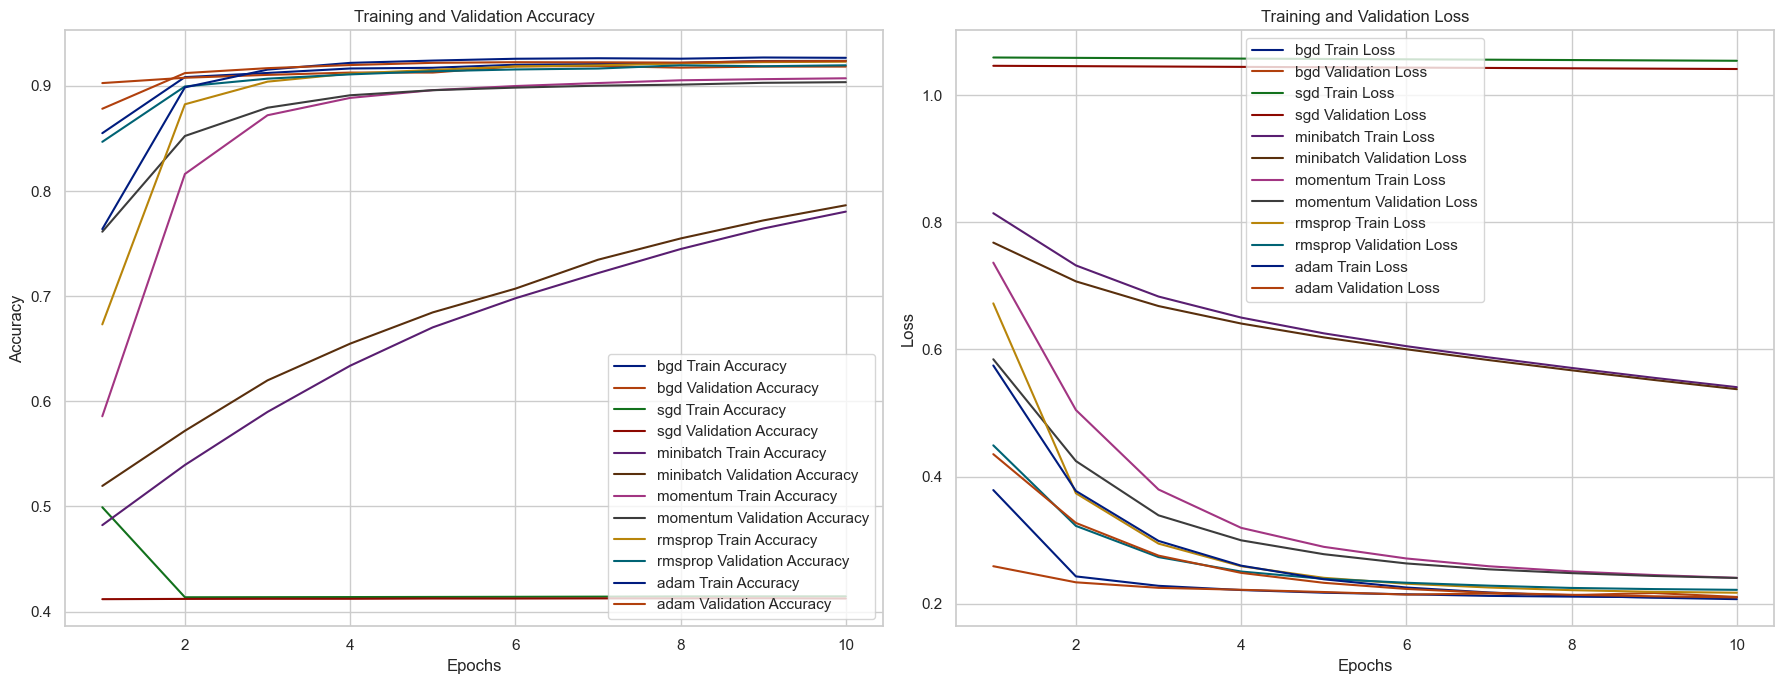

In [48]:
sns.set_style("whitegrid", {'axes.grid' : True})
plt.figure(figsize=(18, 7))

for name, train_acc, val_acc, train_loss, val_loss in opt_res:
    epochs = range(1, len(train_acc) + 1)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label=f'{name} Train Accuracy')
    plt.plot(epochs, val_acc, label=f'{name} Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label=f'{name} Train Loss')
    plt.plot(epochs, val_loss, label=f'{name} Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

### Plot Waktu yang dibutuhkan untuk melatih model dengan berbagai optimizer

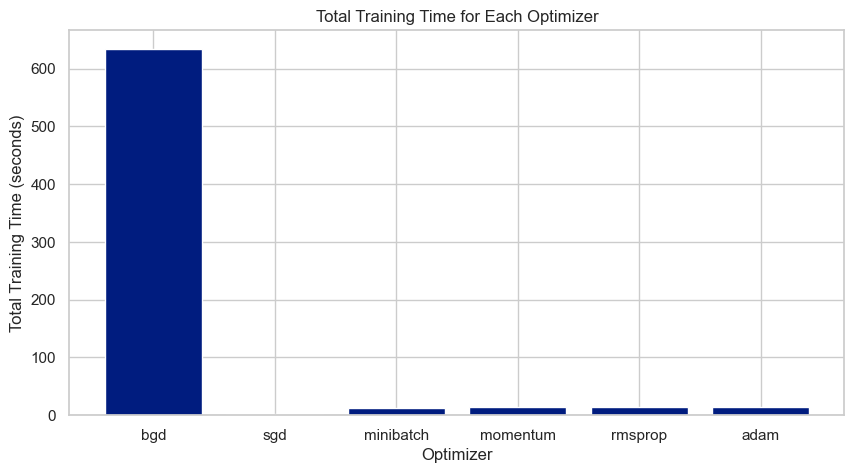

In [49]:
plt.figure(figsize=(10, 5))
plt.bar(total_times.keys(), total_times.values())
plt.xlabel('Optimizer')
plt.ylabel('Total Training Time (seconds)')
plt.title('Total Training Time for Each Optimizer')
plt.show()

### Test Accuracies with Test Dataset

In [51]:
# Print test accuracies for each optimizer
for name, test_acc in test_accuracies:
    print(f"Optimizer: {name}, Test Accuracy: {test_acc:.4f}")

Optimizer: bgd, Test Accuracy: 0.9190
Optimizer: sgd, Test Accuracy: 0.4121
Optimizer: minibatch, Test Accuracy: 0.7797
Optimizer: momentum, Test Accuracy: 0.9052
Optimizer: rmsprop, Test Accuracy: 0.9205
Optimizer: adam, Test Accuracy: 0.9250


### Hyperparameter Tuning: Create ANN Model with Optuna (Optimization)

This one would be so satisfying

In [55]:
def create_model(trial):
    # Define the model
    model = tf.keras.Sequential()
    
    # Suggest the number of layers and units in each layer
    n_layers = trial.suggest_int('n_layers', 1, 2)
    for i in range(n_layers):
        units = trial.suggest_int('units_l{}'.format(i), 32, 64)
        model.add(Dense(units, activation='relu'))
        dropout_rate = trial.suggest_float('dropout_l{}'.format(i), 0.0, 0.5)
        model.add(Dropout(dropout_rate))
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Suggest learning rate for Adam optimizer
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [56]:
def objective(trial):
    # Create the model
    model = create_model(trial)
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    
    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [57]:
study = optuna.create_study(
    direction='maximize',
    storage="sqlite:///db.sqlite3",  # Specify the storage URL here.
    study_name="Credit Risk Finalisasi"
)
study.optimize(objective, n_trials=15)

# Print the best hyperparameters
print(f"Best value: {study.best_value} (params: {study.best_params})")

[I 2024-06-09 17:41:13,297] A new study created in RDB with name: Credit Risk Finalisasi


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:41:28,925] Trial 0 finished with value: 0.934162471621755 and parameters: {'n_layers': 1, 'units_l0': 44, 'dropout_l0': 0.32576143333824414, 'lr': 0.05524065590590353}. Best is trial 0 with value: 0.934162471621755.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:41:43,454] Trial 1 finished with value: 0.925476260981147 and parameters: {'n_layers': 1, 'units_l0': 61, 'dropout_l0': 0.23032506713781953, 'lr': 0.0001503274293820594}. Best is trial 0 with value: 0.934162471621755.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:42:00,170] Trial 2 finished with value: 0.9387029908202547 and parameters: {'n_layers': 2, 'units_l0': 58, 'dropout_l0': 0.2546450629095468, 'units_l1': 57, 'dropout_l1': 0.36136656017251323, 'lr': 0.005179979993563229}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:42:15,137] Trial 3 finished with value: 0.8883624518803672 and parameters: {'n_layers': 1, 'units_l0': 57, 'dropout_l0': 0.37089917247713455, 'lr': 3.48777879693921e-05}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:42:30,085] Trial 4 finished with value: 0.9231072944427994 and parameters: {'n_layers': 1, 'units_l0': 52, 'dropout_l0': 0.4697812001707361, 'lr': 0.0002851733382577417}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:42:44,926] Trial 5 finished with value: 0.9337676438653637 and parameters: {'n_layers': 1, 'units_l0': 33, 'dropout_l0': 0.199449554866922, 'lr': 0.07208202674044589}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:43:00,114] Trial 6 finished with value: 0.9119534103247459 and parameters: {'n_layers': 1, 'units_l0': 57, 'dropout_l0': 0.3351421062864685, 'lr': 8.168263215931477e-05}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:43:15,604] Trial 7 finished with value: 0.9050439245878985 and parameters: {'n_layers': 1, 'units_l0': 63, 'dropout_l0': 0.34751021584323605, 'lr': 6.04341075891413e-05}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:43:30,837] Trial 8 finished with value: 0.9158029809495608 and parameters: {'n_layers': 1, 'units_l0': 51, 'dropout_l0': 0.4155100514009283, 'lr': 0.0001209044760521114}. Best is trial 2 with value: 0.9387029908202547.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:43:47,448] Trial 9 finished with value: 0.9424538545059717 and parameters: {'n_layers': 2, 'units_l0': 36, 'dropout_l0': 0.01865793474566807, 'units_l1': 61, 'dropout_l1': 0.49930289981439535, 'lr': 0.008434875579277152}. Best is trial 9 with value: 0.9424538545059717.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:44:04,530] Trial 10 finished with value: 0.9430460961405587 and parameters: {'n_layers': 2, 'units_l0': 32, 'dropout_l0': 0.004067737327516762, 'units_l1': 63, 'dropout_l1': 0.485483256228779, 'lr': 0.003529804226573149}. Best is trial 10 with value: 0.9430460961405587.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:44:21,469] Trial 11 finished with value: 0.9409732504195045 and parameters: {'n_layers': 2, 'units_l0': 32, 'dropout_l0': 0.009299347915191176, 'units_l1': 63, 'dropout_l1': 0.4835104404560275, 'lr': 0.0038276897285936837}. Best is trial 10 with value: 0.9430460961405587.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:44:39,285] Trial 12 finished with value: 0.93801204224657 and parameters: {'n_layers': 2, 'units_l0': 39, 'dropout_l0': 0.003990248262104185, 'units_l1': 35, 'dropout_l1': 0.04209166002807502, 'lr': 0.006902312782292563}. Best is trial 10 with value: 0.9430460961405587.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:44:56,179] Trial 13 finished with value: 0.9375185075510808 and parameters: {'n_layers': 2, 'units_l0': 38, 'dropout_l0': 0.09672410011734149, 'units_l1': 64, 'dropout_l1': 0.4916633753572745, 'lr': 0.0010025467004810666}. Best is trial 10 with value: 0.9430460961405587.


317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-06-09 17:45:13,423] Trial 14 finished with value: 0.9338663508044616 and parameters: {'n_layers': 2, 'units_l0': 38, 'dropout_l0': 0.08659745832494298, 'units_l1': 51, 'dropout_l1': 0.3077816584041243, 'lr': 0.017519283611739385}. Best is trial 10 with value: 0.9430460961405587.


Best value: 0.9430460961405587 (params: {'n_layers': 2, 'units_l0': 32, 'dropout_l0': 0.004067737327516762, 'units_l1': 63, 'dropout_l1': 0.485483256228779, 'lr': 0.003529804226573149})


In [58]:
# Train and evaluate the final model using the best hyperparameters
best_model = create_model(study.best_trial)
best_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))

y_pred = (best_model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

Epoch 1/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8753 - loss: 0.3022 - val_accuracy: 0.9315 - val_loss: 0.1881
Epoch 2/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9283 - loss: 0.1942 - val_accuracy: 0.9363 - val_loss: 0.1719
Epoch 3/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9356 - loss: 0.1786 - val_accuracy: 0.9372 - val_loss: 0.1734
Epoch 4/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9433 - loss: 0.1638 - val_accuracy: 0.9395 - val_loss: 0.1678
Epoch 5/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9415 - loss: 0.1661 - val_accuracy: 0.9367 - val_loss: 0.1753
Epoch 6/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9427 - loss: 0.1619 - val_accuracy: 0.9402 - val_loss: 0.1632
Epoch 7/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9429 - loss: 0.1610 - val_accuracy: 0.9444 - val_loss: 0.1586
Epoch 8/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9447 - loss: 0.1572 - 

In [59]:
best_model.save("saved_models/94.44_accuracy_model.keras")

In [60]:
loaded_model = tf.keras.models.load_model("saved_models/94.44_accuracy_model.keras")

## 4. Model Evaluation

Memprediksi data X_test dengan model yang sudah disimpan. Hasilnya disimpan di variable y_pred (prediksi)

In [61]:
loaded_model.evaluate(X_test, y_test)

317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 0.2523


[0.22424748539924622, 0.9444279670715332]

kiri output loss function, kanan akurasi

In [62]:
y_pred = loaded_model.predict(X_test)
y_pred

317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.        ],
       [0.22030425],
       [0.9997444 ],
       ...,
       [0.04890002],
       [0.1255103 ],
       [0.1041536 ]], dtype=float32)

nilai dari variable y_pred diubah. Jika nilainya lebih dari 0.5 diubah menjadi 1, jika nilainya kurang dari 0.5 diubah menjadi 0

In [63]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

Visualisasi Confusion Matrix

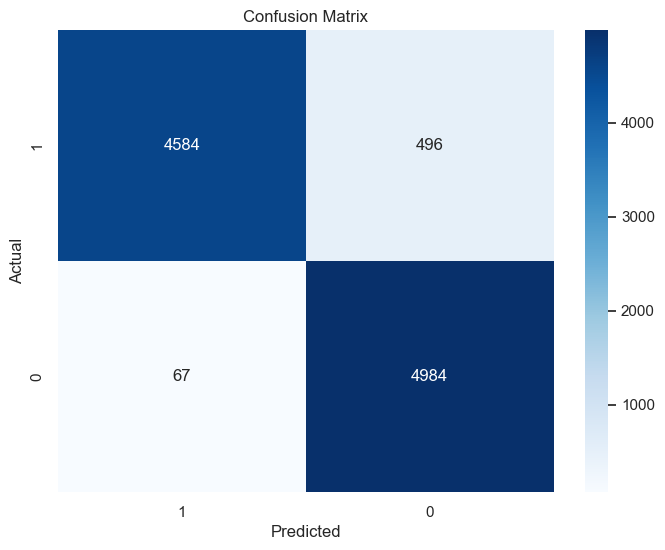

In [64]:
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 0], yticklabels=[1, 0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

Classification Report Confusion Matrix

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5051
           1       0.99      0.90      0.94      5080

    accuracy                           0.94     10131
   macro avg       0.95      0.94      0.94     10131
weighted avg       0.95      0.94      0.94     10131



Adam optimizer menunjukkan performa yang lebih baik dibandingkan optimizer lainnya dalam klasifikasi risiko kredit, selain itu model hyperparameter optuna berhasil mencari hyperparameter terbaik dengan 15 percobaan, sehingga model yang didapatkan dapat lebih maksimum.

# Terima Kasih